## Student Detials
> Title= "Mr"\
> Name= "Ali Nawaz"\
> email = "nawazktk99@gmail.com"\
> whatsapp = "03358043653"

### In this Notebook we are going to know about Decision Tree Classifier using Sci-kit algorithm

## Decision Tree Algorithm
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

![Diagram Decsion Tree](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png)

### How does the Decision Tree algorithm work?
The basic idea behind any decision tree algorithm is as follows:

Select the best attribute using Attribute Selection Measures(ASM) to split the records.
Make that attribute a decision node and breaks the dataset into smaller subsets.
Starts tree building by repeating this process recursively for each child until one of the condition will match:
All the tuples belong to the same attribute value.
There are no more remaining attributes.
There are no more instances.

![How Decsion Trree works](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/2_btay8n.png)

### For More Information visit ([More Details](https://www.datacamp.com/community/tutorials/decision-tree-classification-python))

In [9]:
# import all the lib
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# read the dataset using pandas
df = pd.read_csv('D:/Python ka Chilla/python_chilla/data/mldata.csv')

In [10]:
df.head()

,age,weight,gender,height,likeness
0,27,76.0,Male,170.688,Biryani
1,41,70.0,Male,165.000,Biryani
2,29,80.0,Male,171.000,Biryani
3,27,102.0,Male,173.000,Biryani
4,29,67.0,Male,164.000,Biryani


# Feature Selection

In [11]:
 #split dataset in features and target variable
df['gender'] = df['gender'].replace('Male',  1) 
df['gender'] = df['gender'].replace('Female',  0) 
feature_cols = ['age', 'gender', 'weight']
X = df[feature_cols] # Features
y = df.likeness # Target variable

In [12]:
df['likeness'].value_counts()

Biryani    165
Samosa      46
Pakora      34
Name: likeness, dtype: int64

# Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.


In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6081081081081081


# Decision Tree Model Daving
Let's Save a Decision Tree Model

In [20]:
import pickle
import joblib
filename = 'finalized_model_descsion_tree.joblib'
joblib.dump(clf, filename)

['finalized_model_descsion_tree.joblib']

In [21]:
# using pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 


# Decision Tree Model Loading
Let's load the saved a Decision Tree Model using pickle.

In [24]:
# using job lib
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.6081081081081081


In [25]:
# using pickle
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6081081081081081


## Visalize the Tree of Our Model

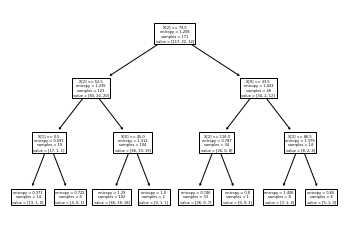

In [27]:
from sklearn import tree
tree.plot_tree(clf);

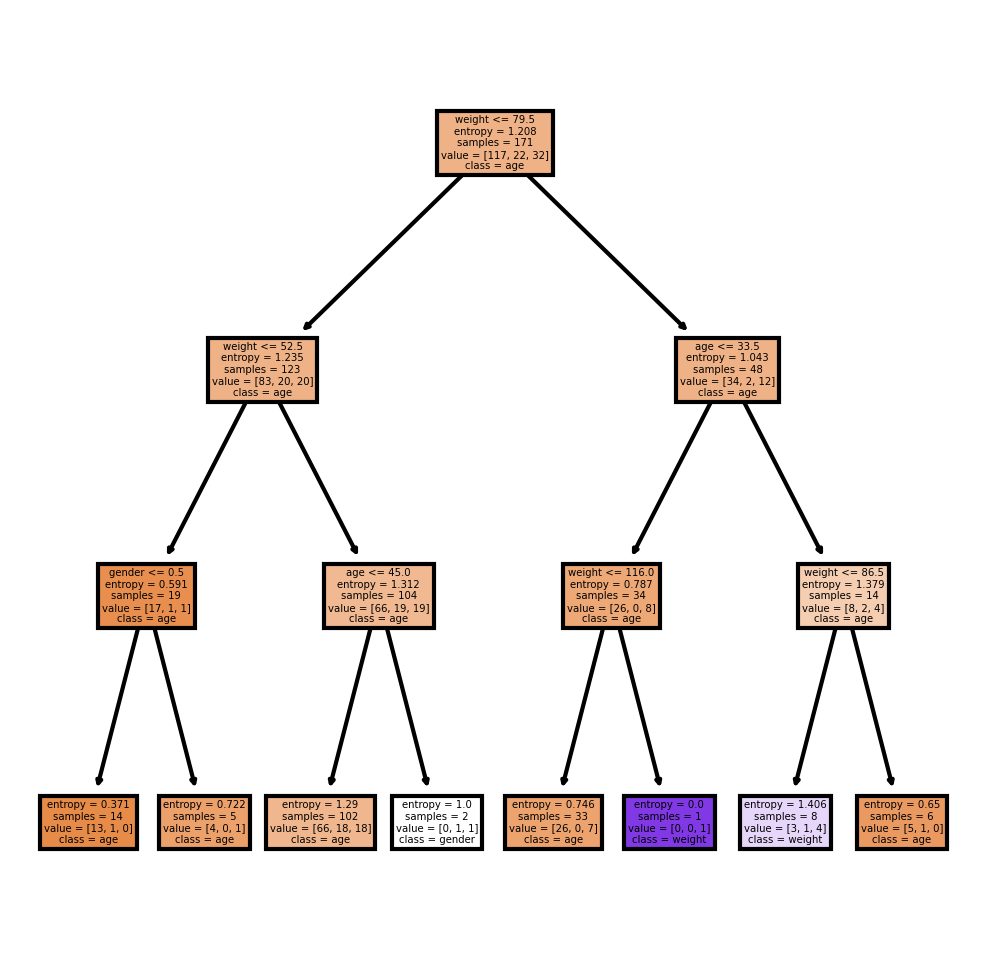

In [29]:
fn=['age', 'gender', 'weight']
cn=['age', 'gender', 'weight']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('descion_tree.png')

In [30]:
tree.export_graphviz(clf, out_file='tree.dot')